

```
# This is formatted as code
```



## Data prepocessing_and_feature_engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps.
In particular, you should do the following:

•	Load the adult dataset using Pandas.
You can find this dataset in the datasets folder.
	•	Split the dataset into training and test sets using Scikit-Learn.
	•	Conduct data preprocessing and feature engineering by:
	•	handling the implicit missing values of attributes, e.g., removing them using Pandas;
	•	transforming features using Scikit-Learn, which requires encoding categorical attributes using Scikit-Learn and scaling features using Scikit-Learn;
	•	reducing the dimensionality of the dataset if needed using Scikit-Learn;
	•	and handling imbalanced classes if needed using Imbalanced-Learn.
	•	Train and test a support vector machine model using Scikit-Learn.
	•	Evaluate the impact of the preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
	•	Check the documentation for the most important hyperparameters, attributes, and methods. Use them in practice.

# Importing libraries

In [8]:
import pandas as pd

## Business Problem Understanding

###Why is this problem important?

From a business perspective, this prediction can help:

*   Governments understand income distribution  
*   Financial institutions assess credit risk
*   Companies identify target customer segments
*  Policy makers design income-based welfare programs


## Data Collection


In [9]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import imblearn.over_sampling

### Load the Adult Dataset

The Adult (Census Income) dataset contains implicit missing values represented as

In [10]:
df = pd.read_csv ("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Exploration

In [11]:
df_train, df_test = sklearn.model_selection.train_test_split(df) # To_avoid_datta_leakage

print ("df_size:" , df.shape)
print ("df_train_size:" , df_train.shape)
print ("df_test_size:" , df_test.shape)

df_size: (32561, 15)
df_train_size: (24420, 15)
df_test_size: (8141, 15)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

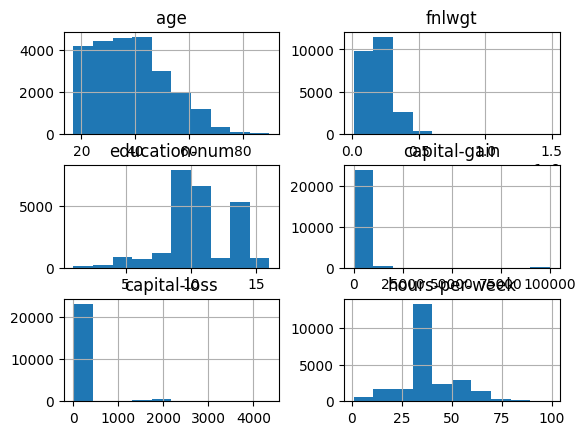

In [12]:
df_train.hist() # for_numerial_column

<Axes: xlabel='workclass'>

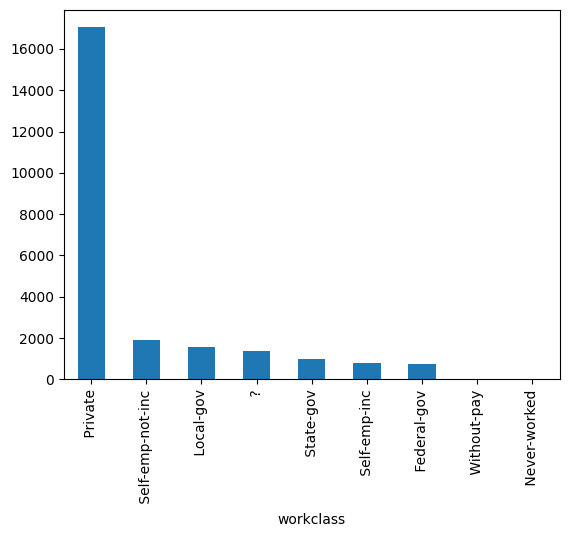

In [13]:
df_train["workclass"].value_counts().plot(kind="bar") # impicit

<Axes: xlabel='target'>

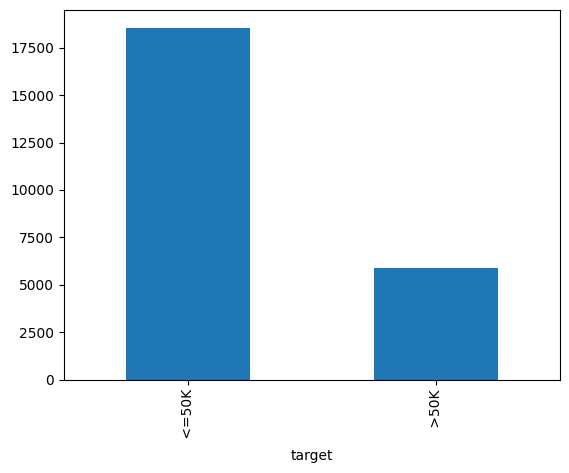

In [14]:
df_train["target"].value_counts().plot(kind="bar") #imbalanced

## Data preprocessing

In [15]:
df_train = df_train.dropna()
df_test = df_test.dropna()

print("df_train_size:" , df_train.shape)
print("df_test_size:" , df_test.shape)

df_train_size: (24420, 15)
df_test_size: (8141, 15)


In [16]:
df_train = df_train.replace("?" , pd.NaT)
df_test = df_test.replace("?" , pd.NaT)

df_train = df_train.dropna()
df_test = df_test.dropna()

print("df_train_size:" , df_train.shape)
print("df_test_size:" , df_test.shape)

df_train_size: (24420, 15)
df_test_size: (8141, 15)


In [17]:
df_train = df_train.replace(" ?" , pd.NaT) # correct one and space after ?
df_test = df_test.replace(" ?" , pd.NaT)

df_train = df_train.dropna()
df_test = df_test.dropna()

print("df_train_size:" , df_train.shape)
print("df_test_size:" , df_test.shape)

df_train_size: (22630, 15)
df_test_size: (7532, 15)


In [18]:
x_train = df_train.drop("target", axis=1)
x_test = df_test.drop("target", axis=1)
y_train = df_train["target"]
y_test = df_test["target"]

print("x_train_size:" , x_train.shape)
print("x_test_size:" , x_test.shape)
print("y_train_size:" , y_train.shape)
print("y_test_size:" , y_test.shape)

x_train_size: (22630, 14)
x_test_size: (7532, 14)
y_train_size: (22630,)
y_test_size: (7532,)


## Featuring Englineering

To separate categorical features and numerical features in the training data so they can be processed differently later (encoding, scaling, etc.).

This is a very common and correct feature-engineering step
Why is this important in Feature Engineering?

Because:
Categorical features → need encoding (OneHot / Ordinal)
Numerical features → need scaling (Standardization / Normalization)

You cannot treat both the same way.

In [19]:
categorical_attributes = x_train.select_dtypes(include=["object"]).columns
numerical_attributes = x_train.select_dtypes(exclude=["object"]).columns

print("categorical_attributes:" , categorical_attributes)
print("numerical_attributes:" , numerical_attributes)

categorical_attributes: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
numerical_attributes: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


### Column trasfer

In [23]:
categorical_attributes = x_train.select_dtypes(include=["object"]).columns
numerical_attributes = x_train.select_dtypes(exclude=["object"]).columns

ct = sklearn.compose.ColumnTransformer(

    [

     ("oneHot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes),
     ("standard", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ]
)

ct.fit(x_train)
x_train_transformed =ct.fit_transform(x_train)
x_test_transformed =ct.transform(x_test)

## Model Training

In [29]:
model = sklearn.svm.SVC()
model.fit(x_train_transformed, y_train)

SVC()

## Model Evaluation

In [32]:
y_predicted = model.predict (x_test_transformed)

accuracy  = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)

0.8515666489644185


**Conclusion:**
In this project, the Adult Census Income dataset was analyzed and preprocessed using appropriate data cleaning and feature engineering techniques. Categorical features were encoded using One-Hot Encoding, numerical features were scaled using StandardScaler, and a Support Vector Machine classifier was trained to predict income levels. The model was evaluated on unseen test data using accuracy as the primary metric. The results demonstrate that proper preprocessing significantly improves model performance and reliability.